# Introduction and Imports

In this notebook, we will:
1. Implement a Perceptron class in PyTorch (OOP style)
2. Check linear separability for given tasks
3. Train perceptrons on solvable problems
4. Generate new linearly separable datasets and classify them
5. Use two neurons for a 4-class classification problem

In [17]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

# Defining the Perceptron Class (OOP)
The perceptron is implemented as a PyTorch nn.Module
It includes:
- forward() for computing linear combination
- predict() for binary classification
- train_perceptron() for custom training with the Perceptron Learning Rule

In [18]:
class Perceptron(nn.Module):
    def __init__(self, input_dim):
        super(Perceptron, self).__init__()
        self.linear = nn.Linear(input_dim, 1, bias=True)
    
    def forward(self, x):
        return self.linear(x)
    
    def predict(self, x):
        with torch.no_grad():
            return (self.forward(x) >= 0).float()
    
    def train_perceptron(self, X, y, lr=0.1, max_epochs=100):
        for epoch in range(max_epochs):
            errors = 0
            for i in range(len(X)):
                xi = X[i].unsqueeze(0)
                yi = y[i]
                output = self.forward(xi)
                yhat = 1.0 if output.item() >= 0 else 0.0
                if yhat != yi.item():
                    # Perceptron update rule
                    self.linear.weight.data += lr * (yi - yhat) * xi
                    self.linear.bias.data += lr * (yi - yhat)
                    errors += 1
            if errors == 0:
                print(f"Converged at epoch {epoch}")
                break

# Helper Function for Visualization

In [19]:
def plot_decision_boundary(model, X, y, title="Decision Boundary"):
    # Create grid
    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    
    grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)
    Z = model.predict(grid).numpy().reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.2, cmap=plt.cm.coolwarm)
    plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title(title)
    plt.show()

# Task 1 – Check Linear Separability
## Data & Visualization

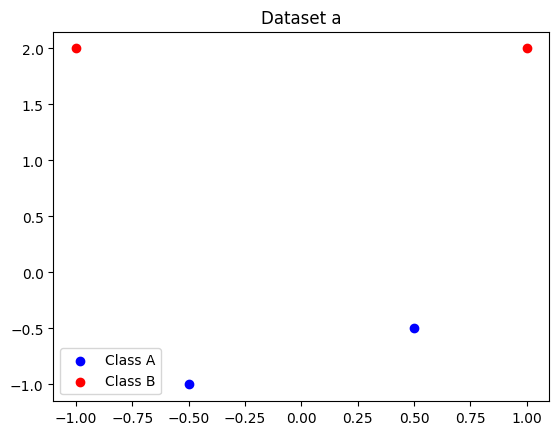

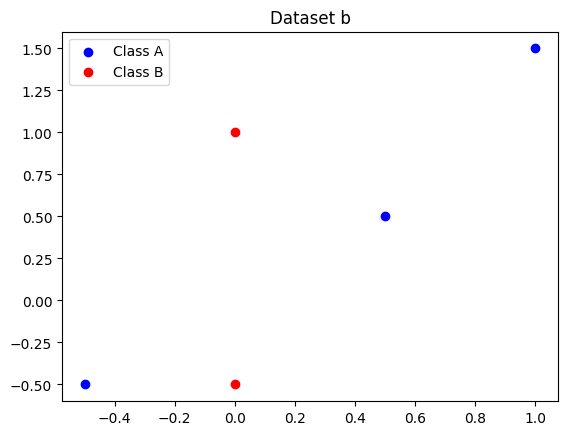

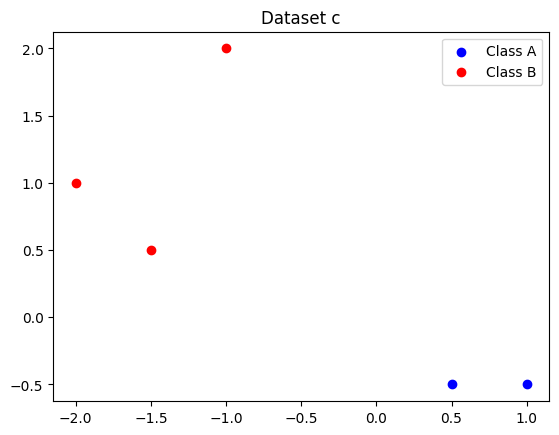

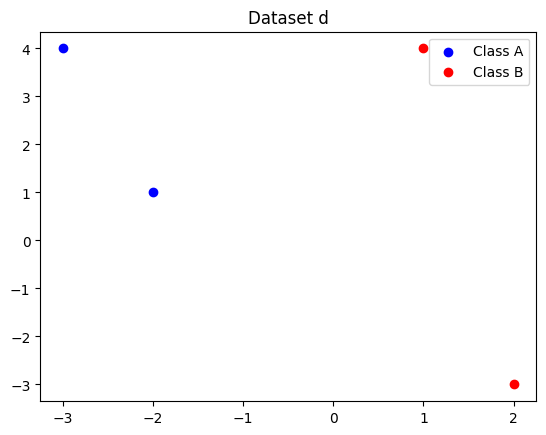

In [20]:
# # Task 1: Check Linear Separability
# We have 4 sub-tasks (a, b, c, d) with given points.
# Each point belongs to class A (label 0) or class B (label 1).

datasets = {
    "a": {
        "A": [[0.5, -0.5], [-0.5, -1]],
        "B": [[1, 2], [-1, 2]]
    },
    "b": {
        "A": [[-0.5, -0.5], [0.5, 0.5], [1, 1.5]],
        "B": [[0, -0.5], [0, 1]]
    },
    "c": {
        "A": [[0.5, -0.5], [1, -0.5]],
        "B": [[-1.5, 0.5], [-1, 2], [-2, 1]]
    },
    "d": {
        "A": [[-2, 1], [-3, 4]],
        "B": [[2, -3], [1, 4]]
    }
}

# Plot each dataset
for key, data in datasets.items():
    A = np.array(data["A"])
    B = np.array(data["B"])
    plt.scatter(A[:,0], A[:,1], color='blue', label='Class A')
    plt.scatter(B[:,0], B[:,1], color='red', label='Class B')
    plt.title(f"Dataset {key}")
    plt.legend()
    plt.show()


## Check Separability with Perceptron

In [21]:
# # Checking Linear Separability using Perceptron Training
# If perceptron converges -> linearly separable

for key, data in datasets.items():
    points = data["A"] + data["B"]
    labels = [0]*len(data["A"]) + [1]*len(data["B"])
    
    X = torch.tensor(points, dtype=torch.float32)
    y = torch.tensor(labels, dtype=torch.float32)
    
    model = Perceptron(input_dim=2)
    print(f"\nDataset {key}:")
    model.train_perceptron(X, y, lr=0.1, max_epochs=100)



Dataset a:
Converged at epoch 3

Dataset b:

Dataset c:
Converged at epoch 2

Dataset d:
Converged at epoch 2


# Task 2 – Train Perceptron on Solvable Datasets

Converged at epoch 1


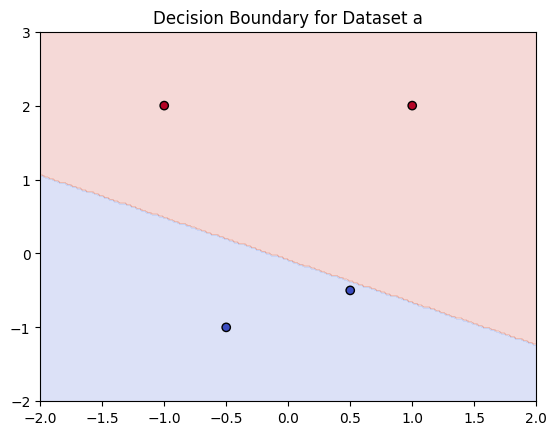

Converged at epoch 3


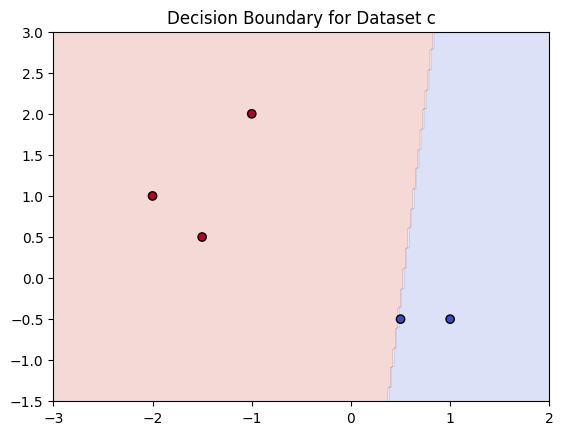

Converged at epoch 0


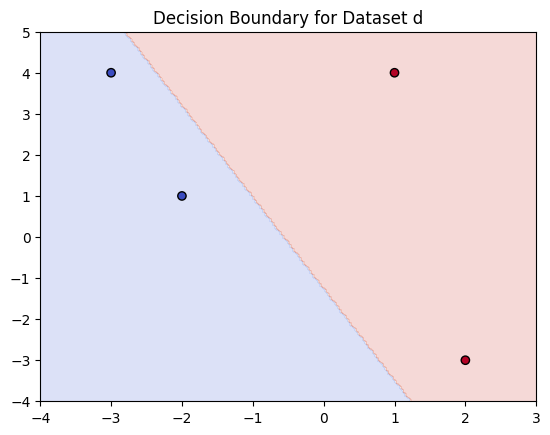

In [22]:
# # Train Perceptron and Visualize Decision Boundary for solvable datasets
solvable = ["a", "c", "d"]  # Assume these are linearly separable

for key in solvable:
    data = datasets[key]
    points = data["A"] + data["B"]
    labels = [0]*len(data["A"]) + [1]*len(data["B"])
    
    X = torch.tensor(points, dtype=torch.float32)
    y = torch.tensor(labels, dtype=torch.float32)
    
    model = Perceptron(input_dim=2)
    model.train_perceptron(X, y, lr=0.1, max_epochs=100)
    plot_decision_boundary(model, X.numpy(), y.numpy(), title=f"Decision Boundary for Dataset {key}")


# Task 3 – Generate Two Separable Classes

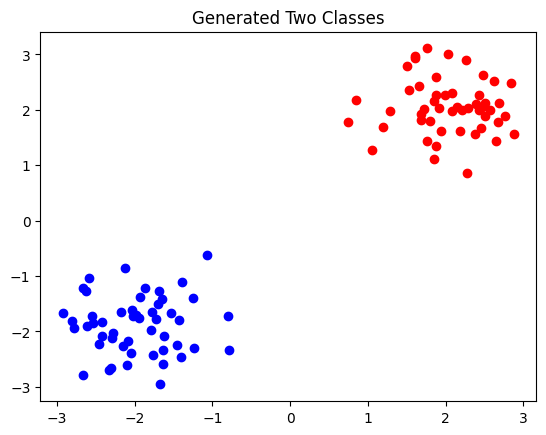

Converged at epoch 0


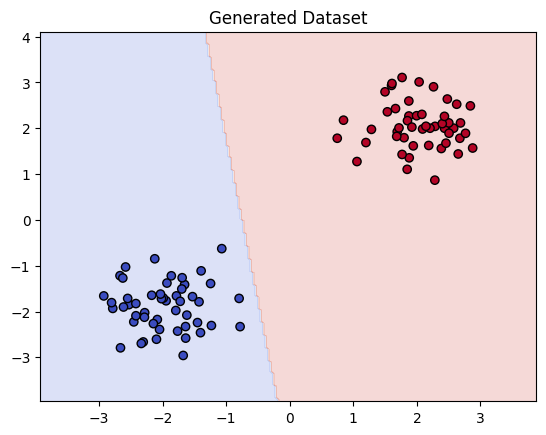

In [23]:
# # Task 3: Generate Two Linearly Separable Classes
# We'll generate random points for two classes

class_A = torch.randn(50, 2) * 0.5 + torch.tensor([-2.0, -2.0])
class_B = torch.randn(50, 2) * 0.5 + torch.tensor([2.0, 2.0])

X = torch.cat([class_A, class_B], dim=0)
y = torch.cat([torch.zeros(50), torch.ones(50)])

plt.scatter(class_A[:,0], class_A[:,1], color='blue')
plt.scatter(class_B[:,0], class_B[:,1], color='red')
plt.title("Generated Two Classes")
plt.show()

model = Perceptron(input_dim=2)
model.train_perceptron(X, y, lr=0.1, max_epochs=100)
plot_decision_boundary(model, X.numpy(), y.numpy(), title="Generated Dataset")


# Task 4 – Two Neurons for Four Classes

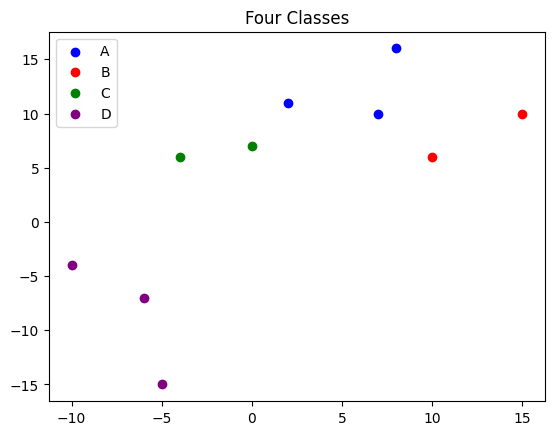

In [24]:
# # Task 4: Two neurons for 4 classes
# We'll use One-vs-Rest strategy with two perceptrons.

classes = {
    "A": [(2,11),(7,10),(8,16)],
    "B": [(10,6),(15,10)],
    "C": [(-4,6),(0,7)],
    "D": [(-6,-7),(-10,-4),(-5,-15)]
}

all_points = []
labels = []
class_names = ["A","B","C","D"]

for i, (k, pts) in enumerate(classes.items()):
    all_points += pts
    labels += [i]*len(pts)

X = torch.tensor(all_points, dtype=torch.float32)
y = torch.tensor(labels, dtype=torch.int64)

# Visualize
colors = ['blue','red','green','purple']
for i, (k, pts) in enumerate(classes.items()):
    pts = np.array(pts)
    plt.scatter(pts[:,0], pts[:,1], color=colors[i], label=k)
plt.title("Four Classes")
plt.legend()
plt.show()


# One-vs-Rest Training

In [25]:
# Train 4 perceptrons (One-vs-Rest)
perceptrons = []
for i in range(4):
    model = Perceptron(input_dim=2)
    # Create binary labels: 1 for current class, 0 for others
    yi = (y == i).float()
    model.train_perceptron(X, yi, lr=0.01, max_epochs=200)
    perceptrons.append(model)

# Prediction function
def predict_multiclass(x):
    scores = [p.forward(x).item() for p in perceptrons]
    return np.argmax(scores)

# Plotting decision boundaries is more complex (needs multiple regions),
# but we'll just show classification for the given points:
for i, pt in enumerate(all_points):
    pred_class = class_names[predict_multiclass(torch.tensor(pt).unsqueeze(0).float())]
    print(f"Point {pt} -> Predicted class: {pred_class}")


Converged at epoch 58
Converged at epoch 33
Converged at epoch 1
Point (2, 11) -> Predicted class: C
Point (7, 10) -> Predicted class: A
Point (8, 16) -> Predicted class: A
Point (10, 6) -> Predicted class: B
Point (15, 10) -> Predicted class: B
Point (-4, 6) -> Predicted class: C
Point (0, 7) -> Predicted class: C
Point (-6, -7) -> Predicted class: D
Point (-10, -4) -> Predicted class: D
Point (-5, -15) -> Predicted class: D
